In [1]:
from sqlalchemy import create_engine
engine = create_engine("sqlite:///hawaii.sqlite")

In [2]:
from sqlalchemy.ext.automap import automap_base
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurements', 'stations']

In [3]:
Measurement = Base.classes.measurements
Station = Base.classes.stations

In [4]:
from sqlalchemy import inspect
inspector = inspect(engine)
columns = inspector.get_columns('measurements')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station VARCHAR
date VARCHAR
prcp FLOAT
tobs INTEGER


In [5]:
columns = inspector.get_columns('stations')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station VARCHAR
name VARCHAR
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [6]:
from sqlalchemy.orm import Session
session = Session(engine)

results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.id > 17776).all()

In [7]:
import pandas as pd
plot_df = pd.DataFrame(results, columns=['date', 'precipitation'])

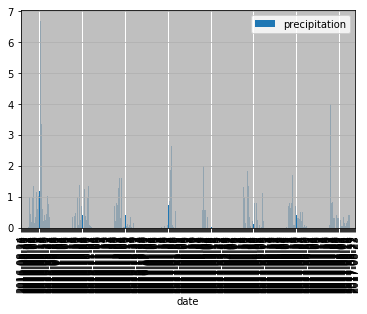

In [8]:
import matplotlib.pyplot as plt

plot_df.plot(x='date', y='precipitation', kind='bar', grid=True, legend=True)

plt.show()